In [1]:
import numpy as np
from numpy import ndarray as arr
import pandas as pd
from matplotlib import pyplot as plt

In [25]:
pd_data: pd.DataFrame = pd.read_csv("data.csv")

data = np.array(pd_data)

del pd_data

In [26]:
np.random.shuffle(data)

data_test: arr = data[:2000] # (2000, 785)
x_test: arr = data_test[:, 1:] / 255.0 # (2000, 784)
y_test: arr = data_test[:, 0] # (2000, 1)

data_train: arr = data[2000:] # (40000, 785)
x_train: arr = data_train[:, 1:] / 255.0 # (40000, 784)
y_train: arr = data_train[:, 0] # (40000, 1)

del data, data_test, data_train

In [27]:
def leakyRelU(x: arr, alpha: float = 0.01) -> arr:
    return np.where(x > 0, x, alpha * x)


def leakyRelUDeriv(x: arr, alpha: float = 0.01) -> arr:
    return np.where(x > 0, 1, alpha)


def softMax(x: arr) -> arr:
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)


def init_parms() -> list[list[arr]]:
    w1: arr = np.random.rand(784, 10) - 0.5
    b1: arr = np.random.rand(1, 10) - 0.5

    w2: arr = np.random.rand(10, 20) - 0.5
    b2: arr = np.random.rand(1, 20) - 0.5

    w3: arr = np.random.rand(20, 10) - 0.5
    b3: arr = np.random.rand(1, 10) - 0.5

    return [[w1, b1], [w2, b2], [w3, b3]]


def forward_prop(nn: list[list[arr]], x: arr) -> list[list[arr]]:
    outputs: list[list[arr]] = []

    for i, (w,b) in enumerate(nn):
        inp: arr = outputs[-1][1] if outputs else x

        z: arr = inp @ w + b
        a: arr = (leakyRelU if i != len(nn) - 1 else softMax)(z)

        outputs.append([z, a])

    return outputs


def one_hot(y: arr) -> arr:
    return np.eye(np.max(y) + 1)[y]

def back_prop(nn: list[list[arr]], outputs: list[list[arr]], x: arr, y: arr) -> list[list[arr]]:
    gradient: list[list[arr]] = []
    z_deltas: list[arr] = []

    for i in range(len(nn) - 1, -1, -1):
        z, a = outputs[i]

        if z_deltas:
            dz = z_deltas[-1].dot(nn[i + 1][0].T) * leakyRelUDeriv(z)
        else:
            dz = a - one_hot(y)
        
        z_deltas.append(dz)
        
        dw = 1 / y.size * dz.T @ (outputs[i - 1][0] if i > 0 else x)
        db = 1 / y.size * np.sum(dz)

        gradient.append([dw, db])

    return gradient[::-1]

def update_params(nn: list[list[arr]], gradient: list[list[arr]], learning_rate: float = 0.25) -> None:
    assert len(nn) == len(gradient)

    for i, (dw, db) in enumerate(gradient):
        nn[i][0] -= learning_rate * dw.T
        nn[i][1] -= learning_rate * db.T


def get_predictions(out: arr) -> arr:
    return np.argmax(out, axis=1)

def get_accuracy(predictions: arr, actual: arr) -> arr:
    return np.sum(predictions == actual) / actual.size


def gradient_descent(nn: list[list[arr]], x: arr, y: arr, iterations: int = 1000) -> None:
    print_freq = (int) (iterations / 50)

    for i in range(iterations):
        out = forward_prop(nn, x)

        grad = back_prop(nn, out, x, y)
    
        update_params(nn, grad)
        
        if i % print_freq == 0:
            print(f"Epoch {i}")
            print(f"Accuracy: {get_accuracy(get_predictions(out[-1][1]), y)}")

nn = init_parms()
gradient_descent(nn, x_train, y_train, 1000)


Epoch 0
Accuracy: 0.1012
Epoch 20
Accuracy: 0.488525
Epoch 40
Accuracy: 0.558175
Epoch 60
Accuracy: 0.732425
Epoch 80
Accuracy: 0.773025
Epoch 100
Accuracy: 0.806575
Epoch 120
Accuracy: 0.8255
Epoch 140
Accuracy: 0.84035
Epoch 160
Accuracy: 0.844975
Epoch 180
Accuracy: 0.8585
Epoch 200
Accuracy: 0.86205
Epoch 220
Accuracy: 0.86725
Epoch 240
Accuracy: 0.86865
Epoch 260
Accuracy: 0.869875
Epoch 280
Accuracy: 0.8757
Epoch 300
Accuracy: 0.88025
Epoch 320
Accuracy: 0.8817
Epoch 340
Accuracy: 0.884725
Epoch 360
Accuracy: 0.88665
Epoch 380
Accuracy: 0.888225
Epoch 400
Accuracy: 0.89045
Epoch 420
Accuracy: 0.89235
Epoch 440
Accuracy: 0.893075
Epoch 460
Accuracy: 0.893575
Epoch 480
Accuracy: 0.894525
Epoch 500
Accuracy: 0.8974
Epoch 520
Accuracy: 0.900325
Epoch 540
Accuracy: 0.89945
Epoch 560
Accuracy: 0.901225
Epoch 580
Accuracy: 0.9037
Epoch 600
Accuracy: 0.903275
Epoch 620
Accuracy: 0.9039
Epoch 640
Accuracy: 0.906125
Epoch 660
Accuracy: 0.906125
Epoch 680
Accuracy: 0.906725
Epoch 700
Accura

In [31]:
def predict(nn: list[list[arr]], x: arr) -> arr:
    return get_predictions(forward_prop(nn, x)[-1][1])

predictions = predict(nn, x_test)

print(get_accuracy(predictions, y_test))

0.924


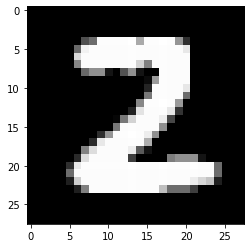

Prediction: 2


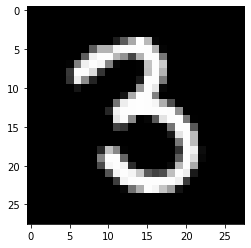

Prediction: 3


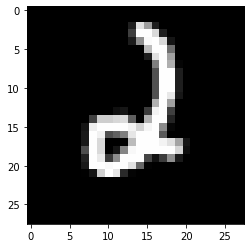

Prediction: 2


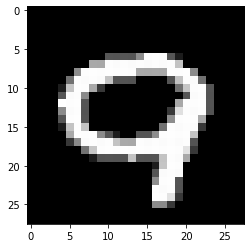

Prediction: 9


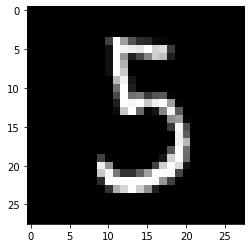

Prediction: 3


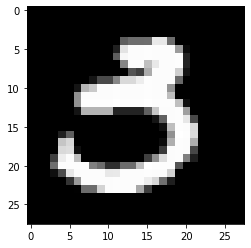

Prediction: 3


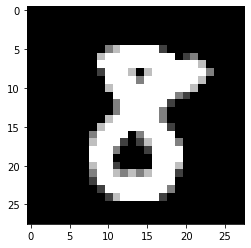

Prediction: 8


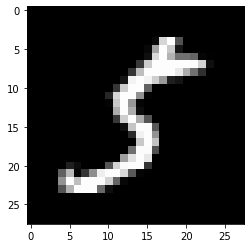

Prediction: 5


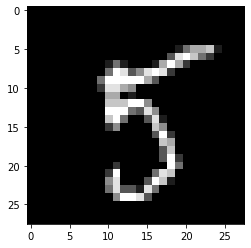

Prediction: 5


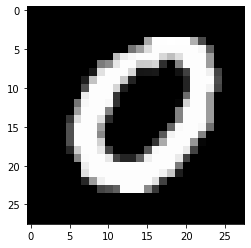

Prediction: 0


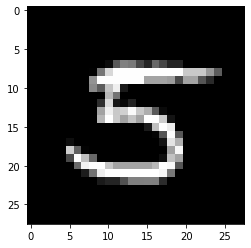

Prediction: 5


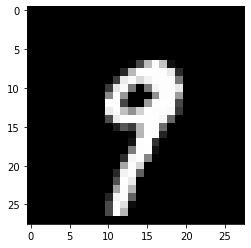

Prediction: 9


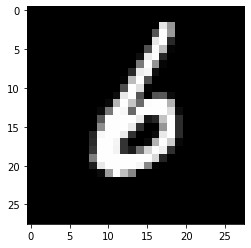

Prediction: 6


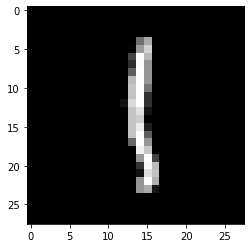

Prediction: 1


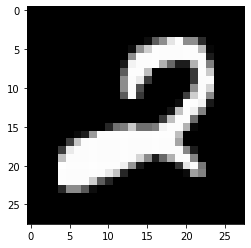

Prediction: 2


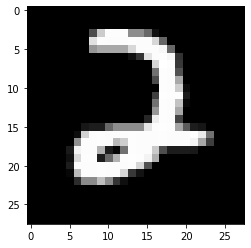

Prediction: 2


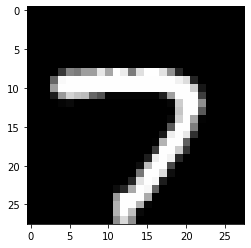

Prediction: 7


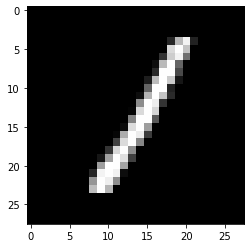

Prediction: 1


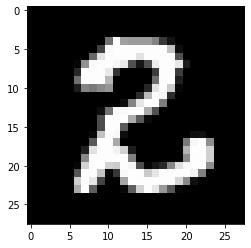

Prediction: 2


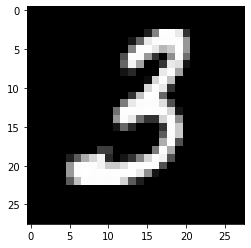

Prediction: 3


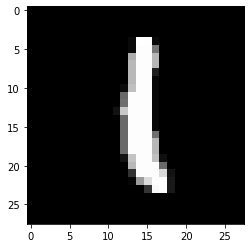

Prediction: 1


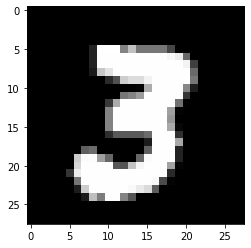

Prediction: 3


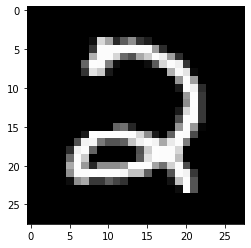

Prediction: 2


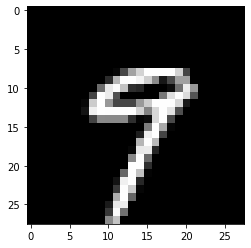

Prediction: 9


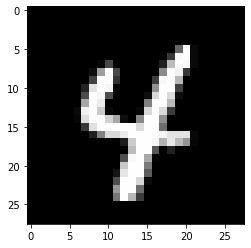

Prediction: 4


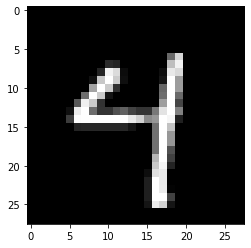

Prediction: 9


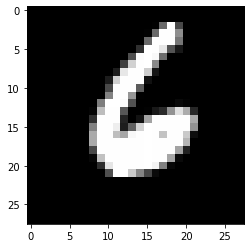

Prediction: 6


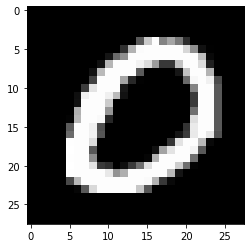

Prediction: 0


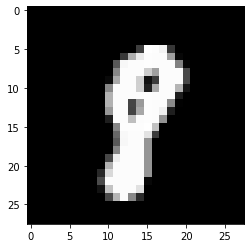

Prediction: 8


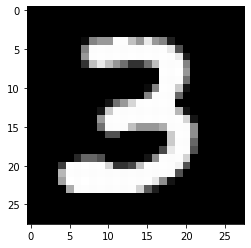

Prediction: 3


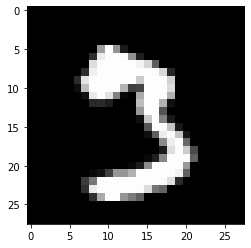

Prediction: 3


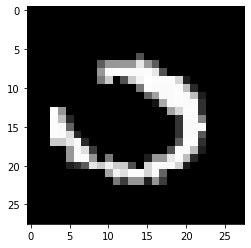

Prediction: 2


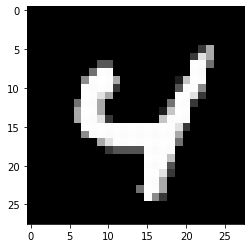

Prediction: 4


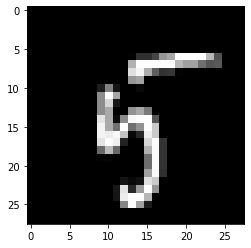

Prediction: 8


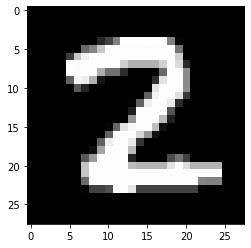

Prediction: 2


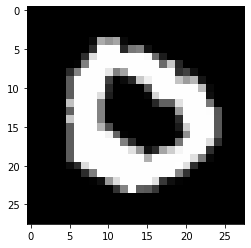

Prediction: 0


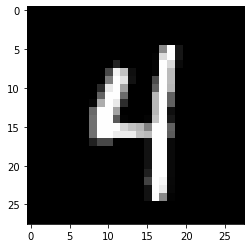

Prediction: 4


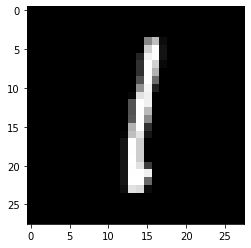

Prediction: 1


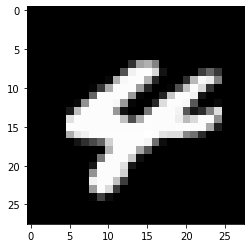

Prediction: 4


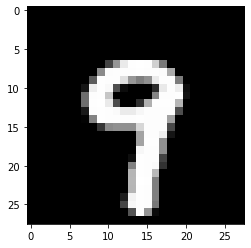

Prediction: 9


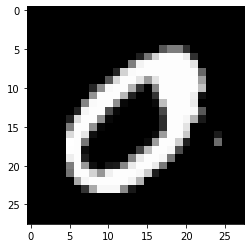

Prediction: 7


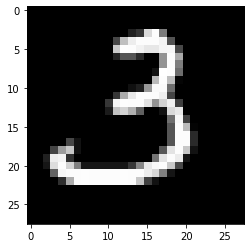

Prediction: 3


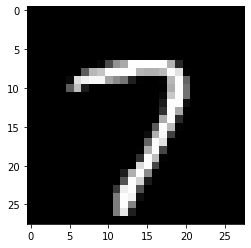

Prediction: 7


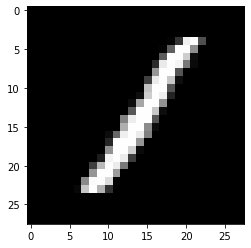

Prediction: 1


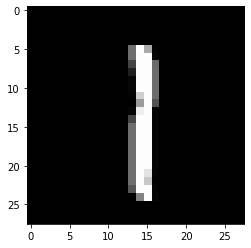

Prediction: 1


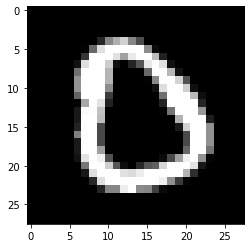

Prediction: 0


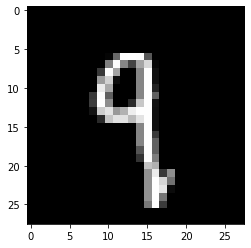

Prediction: 1


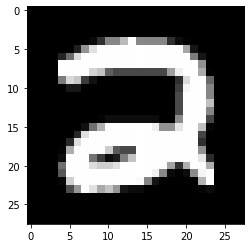

Prediction: 2


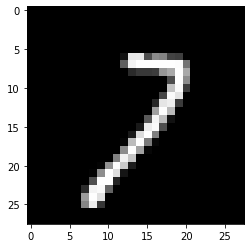

Prediction: 7


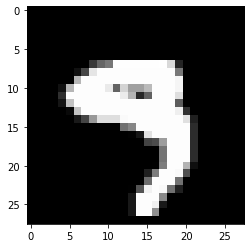

Prediction: 9


In [33]:
for img, p, _ in zip(x_test, predictions, range(50)):
    plt.gray()
    plt.imshow(img.reshape((28, 28)) * 255)
    plt.show()
    print(f"Prediction: {p}")
